## Importing all the Required Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.linear_model import LinearRegression
# special matplotlib argument for improved plots
from matplotlib import rcParams
from keras.models import Sequential
from keras.layers import Dense

## Import the data set which is in a csv format 

You can find the link to the data set here

In [37]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

## Data Preparation

In [36]:
print(boston.data.shape)`

(506, 13)


In [38]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [39]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [46]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [48]:
print('Dataset Shape before drop_duplicate : ', bos.shape)
chi_crime.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', bos.shape)

Dataset Shape before drop_duplicate :  (506, 13)
Dataset Shape after drop_duplicate:  (506, 13)


In [49]:
print(boston.target.shape)

(506,)


In [51]:
bos['PRICE'] = boston.target
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [52]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

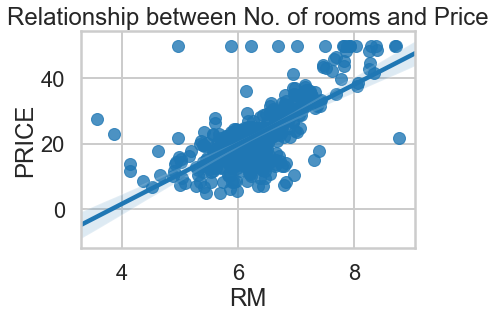

In [84]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=bos, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()

 We can see a strong positive correlation between no. of rooms and price. No. of rooms increases/decreases with increase/decrease in price.

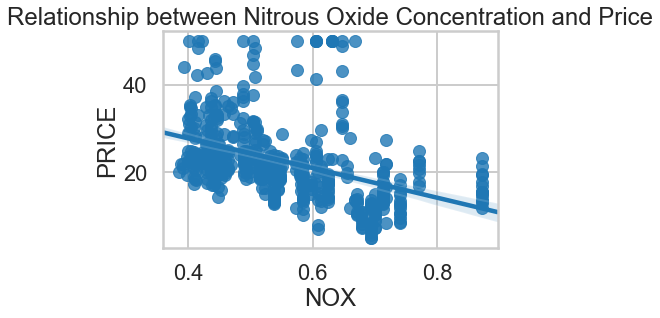

In [86]:
# Between prices and Nitrous Oxide Concentration
sns.regplot(y="PRICE",x="NOX", data=bos, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and Price")
plt.show()

We can see a strong postive correlation between distance of 5 employment center from town and price. The closer/farther the employment center from town the more/less the housing prices.

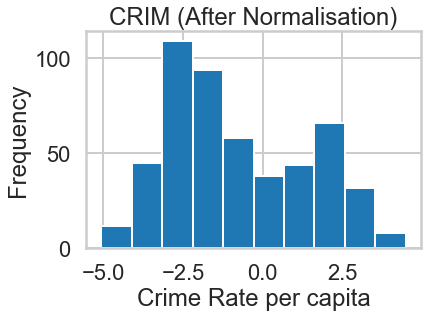

In [92]:
plt.hist(adj_CRIM)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Frequency")
plt.title("CRIM (After Normalisation)")
plt.show()

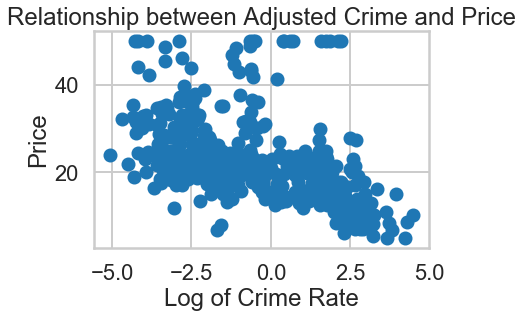

In [90]:
adj_CRIM = np.log(bos.CRIM)
plt.scatter(adj_CRIM , bos.PRICE)
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()


We must check for normality among variables . If they skewed in any way we need to transform them by taking log in order to normise them.
We saw that the scatter plot between Price and Crime Rate an observed an exponential decay of crimes. This can be overcome by normalising.

## Data Segregation

In [54]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## Model Training

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

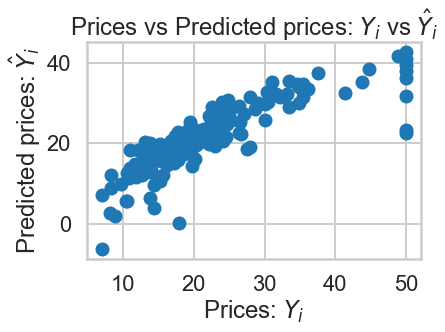

In [64]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Candidate Model Evaluation

In [65]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974583
